# Week 3 - Univariate Analysis

## Please run the cells of the notebook as you get to them while reading

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# 1. Lesson: Bar charts and univariate graphs

Let's make a dataset (in this case, just a series) which is weighted to have more small values than large values.  By squaring a random number between 0 and 1, we ensure that half (those whose initial value is below 0.5) are below 0.25, while the other half are between 0.25 and 1.  This means that most of the values are small, and it's more interesting than analyzing a perfectly uniform dataset.  This kind of trick - transforming one random variable to get another - can generate a variety of random datasets for you.  We then multiply by 100 to get a number between 0 and 100.

In [5]:
np.random.seed(0)
lesson_series = np.round(np.random.random(size = 1000)**2 * 100, 2)
lesson_series[0:10] # check the first ten values.  Are they mostly on the small side?

array([30.12, 51.15, 36.33, 29.69, 17.95, 41.72, 19.15, 79.53, 92.86,
       14.7 ])

In [6]:
import seaborn as sns

In the plot below, you can see a histogram of the values in the series.  For some reason, it decided to have exactly 11 bins (we allowed it to choose the number of bins.)  Most values - about 300 of them - are between 0 and 9, and the next most likely bin is between 9 and 18.  Since there are 1000 values, the total of the bars should be 1000.

<Axes: ylabel='Count'>

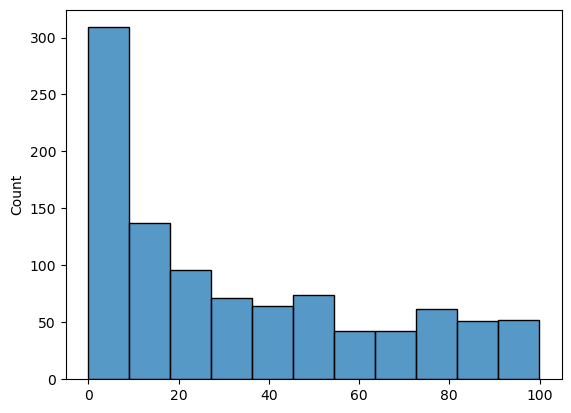

In [8]:
sns.histplot(lesson_series)

There are 11 bins or bars, a number which by default is chosen by seaborn.  We can reproduce this manually to (hopefully) see the same values as numbers. I'm not sure that this second histogram is guaranteed to be exactly the same, but it looks the same to me:

In [10]:
np.histogram(lesson_series, bins = 11)[0]

array([309, 137,  96,  71,  64,  74,  42,  42,  62,  51,  52], dtype=int64)

What happens if we override seaborn and choose the number of bins ourselves?  We could choose a much larger number of bins:

<Axes: ylabel='Count'>

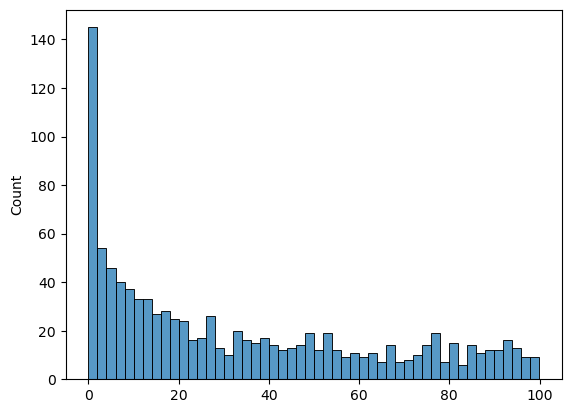

In [12]:
sns.histplot(lesson_series, bins = 50)

One disadvantage of this 50 bin picture is that the outliers are worse.  That is, the graph wobbles up and down a bit more randomly.  That's because there are fewer values in each bin, so there's more of a role for chance to take effect.  If we had many more data points and/or fewer bins, we could get rid of this wobble.

<Axes: ylabel='Count'>

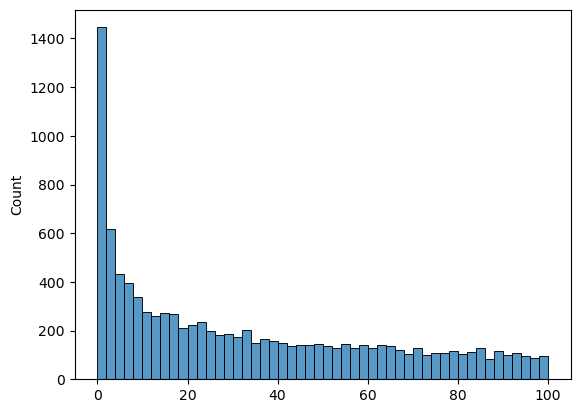

In [14]:
lesson_series_2 = np.round(np.random.random(size = 10000)**2 * 100, 2)
sns.histplot(lesson_series_2, bins = 50)

Here you can see that because the number of bins is the same as in the second graph above, but for more data, the histogram is a smoother graph.  Why does more data make for a smoother graph?  Something for you to think about.  I said it's because a larger number of data points in each bin reduces the role of chance - but why is that?

Here is a KDE (Kernel Density Estimate) plot.  It's just the same histogram, but drawn smoothly.  The KDE plot doesn't have a "number of bins."  It's always drawn the same way.  In this case, because of the smoothness of the curve, it seems that x-values less then zero and above 100 are still plotted, even though there were no such values in the dataset.  This seems like a drawback of the KDE plot, especially if the viewer is unprepared for this aspect of the plot.

<Axes: ylabel='Density'>

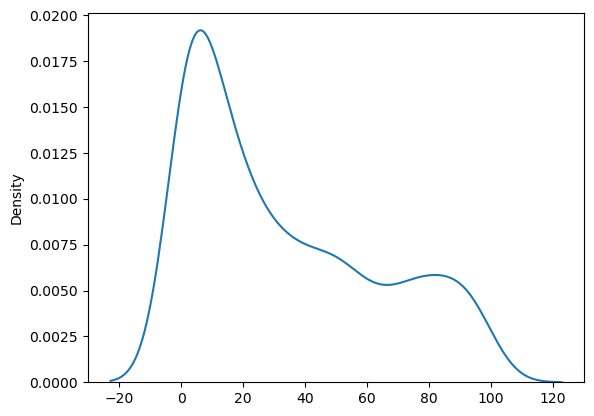

In [17]:
sns.kdeplot(lesson_series)

We could also draw a box plot.  This time, to construct the data I used a fourth power rather than squaring, with only 100 data points, so that the points are even more concentrated toward the small numbers.  It turns out that this will create a more interesting boxplot.  The top and bottom edges of the box are the 75th and 25th percentile, respectively, and the top and bottom "whiskers" show a larger range which is a multiple of 1.5 times the the box height.  (The bottom whisker cannot be see because it's pushed against the bottom of the graph.)  The filled-in box shows that half of the values are between about 0 and 30 on the y-axis.  Is that what you'd expect?  The 25th and 75th percentile of the original uniform random variable are at 0.25 and 0.75.  Taken to the fourth power and multiplied by 100 (remember, that's how we constructed our sample), that's 0.25\*\*4 * 100 = 0.4 and 0.75\*\*4 * 100 = 32.  It's plausible that those are the height of the bottom and top of the box.  We can see that a small number of samples are above the top whisker; they are shown as individual dots.

<Axes: >

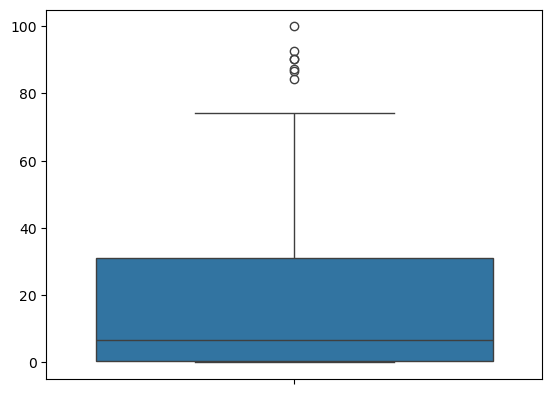

In [19]:
lesson_series_3 = np.round(np.random.random(size = 100)**4 * 100, 2)
sns.boxplot(lesson_series_3)

If we go back to the original lesson_series with the squared values, there will be two whiskers, because it isn't so strongly weighted toward small values:

<Axes: >

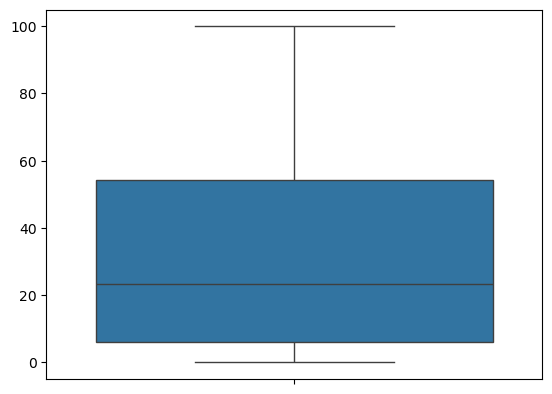

In [21]:
sns.boxplot(lesson_series)

Going back to the fourth power series, another histogram variant is the violin plot.  This simply combines a kde plot (turned on its side and forming two side of the violin) with a boxplot:

<Axes: >

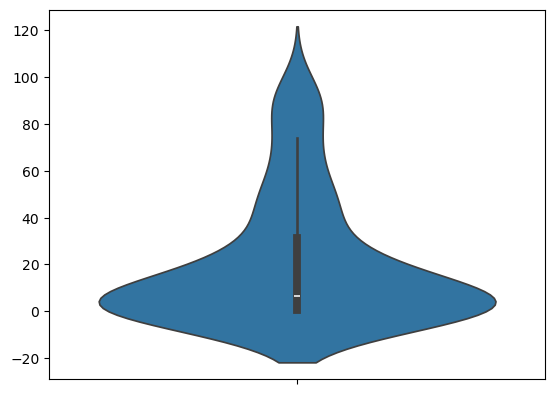

In [23]:
sns.violinplot(lesson_series_3)

Finally, a swarm plot shows the histogram (turned on its side and doubled, as with the violin plot) but showing each individual point.

<Axes: >

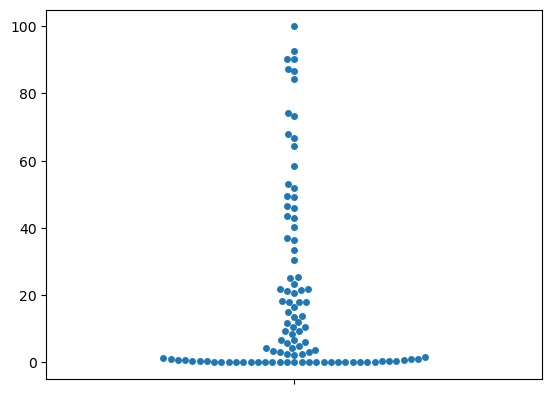

In [25]:
sns.swarmplot(lesson_series_3)

# 2. Weekly graph question

Below are a histogram and table representation of the same data.  A species of bird is being analyzed, and each individual's body length in inches has been measured.

Please write a short explanation of the pros and cons of these two representations.  Which would you choose?  How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [28]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 10000
data = np.random.normal(size = num_data) + 6
df = pd.DataFrame(data.T, columns = ["data"])

In [29]:
histnums = np.histogram(df["data"])
histcounts = histnums[0]
histmins = histnums[1][0:-1]
histmaxes = histnums[1][1:]

In [30]:
pd.DataFrame(np.array([histcounts, histmins, histmaxes]).T, columns = ["count", "minval", "maxval"])

,count,minval,maxval
0,10.0,2.259899,3.014075
1,110.0,3.014075,3.768252
2,579.0,3.768252,4.522428
3,1710.0,4.522428,5.276604
4,2833.0,5.276604,6.030780
5,2688.0,6.030780,6.784956
6,1479.0,6.784956,7.539132
7,487.0,7.539132,8.293308
8,97.0,8.293308,9.047484
9,7.0,9.047484,9.801660


<Axes: ylabel='Frequency'>

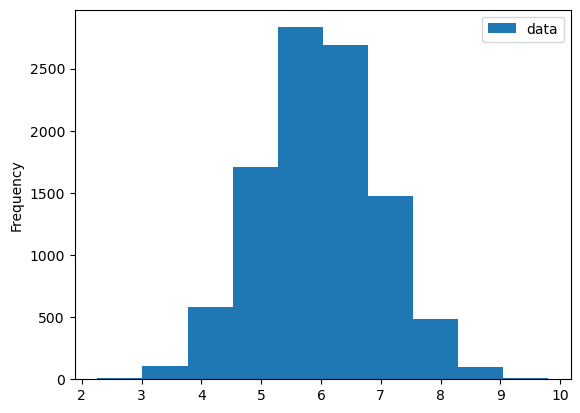

In [31]:
df.plot.hist()

Looking at our first reprentation, the basic table output of our dataframe some strengths would be that this view allows us to see the exact count of obersvations within each bin range. If we ever needed to do reporting or a comparison between our groupings, the table view would let us this by being able to easily identify the values in each bin. Additionally, the table view allows us to see the exact grouping range via our minval and maxvals. As for cons, a table view is generally less engaging than a visualization and do not allow us to easily idenitfy any overarching patterns in a dataset.

As for the histogram, it's primary strength lies in the fact that it is a quick way to give us visual representation of the dsitribution in our dataset. As part of this, we can more easily identify the shape of our dataset as well as highlight some basic patterns/trends. As for cons, the histogram is somewhat the opposite of the table view. We do not know the precise amount of values in each bin in addition to the bins exact boundaries.

Personally, If I had to choose, I would most likely go with the histogram as it is better for presentation, EDA, and easily communicates the shape/distribution of our datasets.

Looking at some improvements for the table view, I would look to add some form of header, describing more about what the data is about and explaining what the min/max vals mean (in this case bird species body length). I might also look to add a percentage frequency and other relevant counts in addition to the basic raw counts.

As for some improvements on the histogram, I would start by adding an x-axis label in addition to a title to more clearly distinquish what the graph is about. I might also look for ways to make our bins more visually distinct. In addition I might look to add some additionaly features, such as a KDE curve and lines showcase the mean, median, and mode. 

# 3. Homework - Amusement Park Rides

Now let's imagine we have some data about how many times different visitors to an amusement park used each ride, as well as how much money they spend at the amusement park.  Each sample represents a single visit by a single visitor on a given date.

In [35]:
num_visits = 10000
np.random.seed(0)

In [36]:
df = pd.DataFrame(columns = ["VisitDate"])

In [37]:
start = datetime(2010, 1, 1)
end = datetime(2024, 1, 1)
numdays = (end - start).days
random_days = np.random.randint(0, numdays, size = num_visits)
s = start + pd.to_timedelta(random_days, unit='D')
s = s.sort_values()
df["VisitDate"] = s

In [38]:
df["IsAdult"] = np.random.choice([True, True, False], size = num_visits)

In [39]:
df["MartianRide"] = np.random.choice([0] * 8 + [1] * 3 + [2] * 3 + [3] * 1 + [10], size = num_visits) * df["IsAdult"]

In [40]:
df["TeacupRide"] = np.random.choice([0] * 2 + [1] * 5 + [2] * 3 + [5] * 2, size = num_visits) * ~df["IsAdult"]

In [41]:
df["RiverRide"] = np.random.choice([0] * 8 + [1] * 3 + [2] * 2, size = num_visits) * df["IsAdult"] + np.random.randint(1, 5, size = num_visits) * ~df["IsAdult"]

In [42]:
df["MoneySpent"] = np.round(np.random.random(size = num_visits)**2 * 100, 2)

In [43]:
df.iloc[0:5]

,VisitDate,IsAdult,MartianRide,TeacupRide,RiverRide,MoneySpent
0,2010-01-01,False,0,1,4,10.30
1,2010-01-01,True,3,0,0,38.77
2,2010-01-01,True,0,0,0,79.34
3,2010-01-01,True,0,0,1,87.84
4,2010-01-02,False,0,1,2,18.65


1. Find the mean, median, and mode for how many times visitors rode each ride.  See Week 1 for Google advice on this.

Let's enlist the use of the helper function that we created for the previous week's notebook

In [46]:
def col_summary_stastistics(df, col):
    mean_val = df[col].mean()
    median_val = df[col].median()
    mode_val = df[col].mode()

    print(f"{col} Mean: {mean_val}")
    print(f"{col} Median: {median_val}")
    print(f"{col} Mode: {mode_val.tolist()}")
    print('\n')

In [47]:
interested_numeric_columns = ['MartianRide', 'TeacupRide', 'RiverRide']
for col in interested_numeric_columns:
    col_summary_stastistics(df, col)

MartianRide Mean: 0.9073
MartianRide Median: 0.0
MartianRide Mode: [0]


TeacupRide Mean: 0.5862
TeacupRide Median: 0.0
TeacupRide Mode: [0]


RiverRide Mean: 1.2007
RiverRide Median: 1.0
RiverRide Mode: [0]




2. Use groupby() to find the mean, median, and mode for how many times each ride was ridden on each given day.

Suggested Google search or ChatGPT prompt: 
I first tried: "How do I use groupby to find the mean over each day in my DataFrame?" but Google didn't help me.

Then I tried: "How do I find the mean over each date in a dataframe?"  Sometimes, you have to try multiple searches.

This gives me a very helpful site, where someone is doing the same thing we are:

https://stackoverflow.com/questions/40788530/how-to-calculate-mean-of-some-rows-for-each-given-date-in-a-dataframe

In [50]:
mean_by_date = df.groupby('VisitDate')[interested_numeric_columns].mean()
median_by_date = df.groupby('VisitDate')[interested_numeric_columns].median()
mode_by_date = df.groupby('VisitDate')[interested_numeric_columns].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

In [51]:
print("Mean Grouped by VisitDate:")
mean_by_date[0:5]

Mean Grouped by VisitDate:


,MartianRide,TeacupRide,RiverRide
VisitDate,,,
2010-01-01,0.75,0.25,1.25
2010-01-02,0.00,1.00,2.00
2010-01-03,0.00,1.50,1.25
2010-01-04,0.00,0.00,1.00
2010-01-05,0.50,0.00,0.00


In [52]:
print("Median Grouped by VisitDate:")
median_by_date[0:5]

Median Grouped by VisitDate:


,MartianRide,TeacupRide,RiverRide
VisitDate,,,
2010-01-01,0.0,0.0,0.5
2010-01-02,0.0,1.0,2.0
2010-01-03,0.0,0.5,0.5
2010-01-04,0.0,0.0,1.0
2010-01-05,0.5,0.0,0.0


In [53]:
print("Mode Grouped by VisitDate:")
mode_by_date[0:5]

Mode Grouped by VisitDate:


,MartianRide,TeacupRide,RiverRide
VisitDate,,,
2010-01-01,0,0,0
2010-01-02,0,1,2
2010-01-03,0,0,0
2010-01-04,0,0,1
2010-01-05,0,0,0


3. Find the standard deviation and variance of the count for each ride.

Suggested Google search or ChatGPT prompt: "How do I find the standard deviation of a Series in pandas documentation?" and similar query for variance.

I included the word "documentation" because this task likely involves applying one single function for standard deviation and another for variance, so I expected that I could find a single documentation page for each that would cover my needs.  I get these:

https://pandas.pydata.org/pandas-docs/dev/reference/api/pandas.Series.var.html

https://pandas.pydata.org/docs/reference/api/pandas.Series.std.html

In [55]:
for col in interested_numeric_columns:
    std = df[col].std()
    var = df[col].var()
    print(f"{col} Standard Deviation : {std:.2f} | Variation {var:.2f}")

MartianRide Standard Deviation : 2.08 | Variation 4.32
TeacupRide Standard Deviation : 1.23 | Variation 1.52
RiverRide Standard Deviation : 1.30 | Variation 1.68


4. Find the 90th percentile count for each ride.  That is, if the customers are ordered by their number of rides, and there are 100 customers, how many rides does the 90th person take?  There is a function in pandas that easily does this calculation.

Suggested Google search or ChatGPT prompt: "How do I find a percentile value for a Series in pandas documentation?"

This time, I will let you find the page!  Hint: it's not actually called the "percentile" function.

In [57]:
for col in interested_numeric_columns:
    quantile_90 = np.quantile(df[col], 0.9)
    print(f"{col} 90th Percentile : {quantile_90}")

MartianRide 90th Percentile : 2.0
TeacupRide 90th Percentile : 2.0
RiverRide 90th Percentile : 3.0


5. Plot a histogram of the ride count, using each day as data element as you did in #2.  Use both the total ride count for each day as well as, separately, the mean ride count for each day.

Suggested Google search or ChatGPT prompt: "How do I plot a histogram for a Series in pandas?"

I found this: https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.hist.html

Note: the "by" keyword will not help you plot a count for each day; if you try to use it for this, it will try to draw a separate histogram for each day.

You've already learned how to find the mean ride count for each day.  Can you use a similar idea to find the total ride count for each day?

In [59]:
import matplotlib.pyplot as plt

In [60]:
def ride_hists(df, ride):
    fig, axes = plt.subplots(1, 2, figsize=(16, 7))
    total_ride_sum = df.groupby('VisitDate')[ride].sum()
    total_ride_mean = df.groupby('VisitDate')[ride].mean()
    
    sns.histplot(total_ride_sum, ax=axes[0])
    axes[0].set_title(f"Distribution of {ride} Daily Ride Totals")
    axes[0].set_xlabel("Total Ride Count")
    axes[0].set_ylabel("Frequency")

    sns.histplot(total_ride_mean, ax=axes[1])
    axes[1].set_title(f"Distribution of Average {ride} Daily Rides")
    axes[1].set_xlabel("Average Ride Count")
    axes[1].set_ylabel("Frequency")

    return

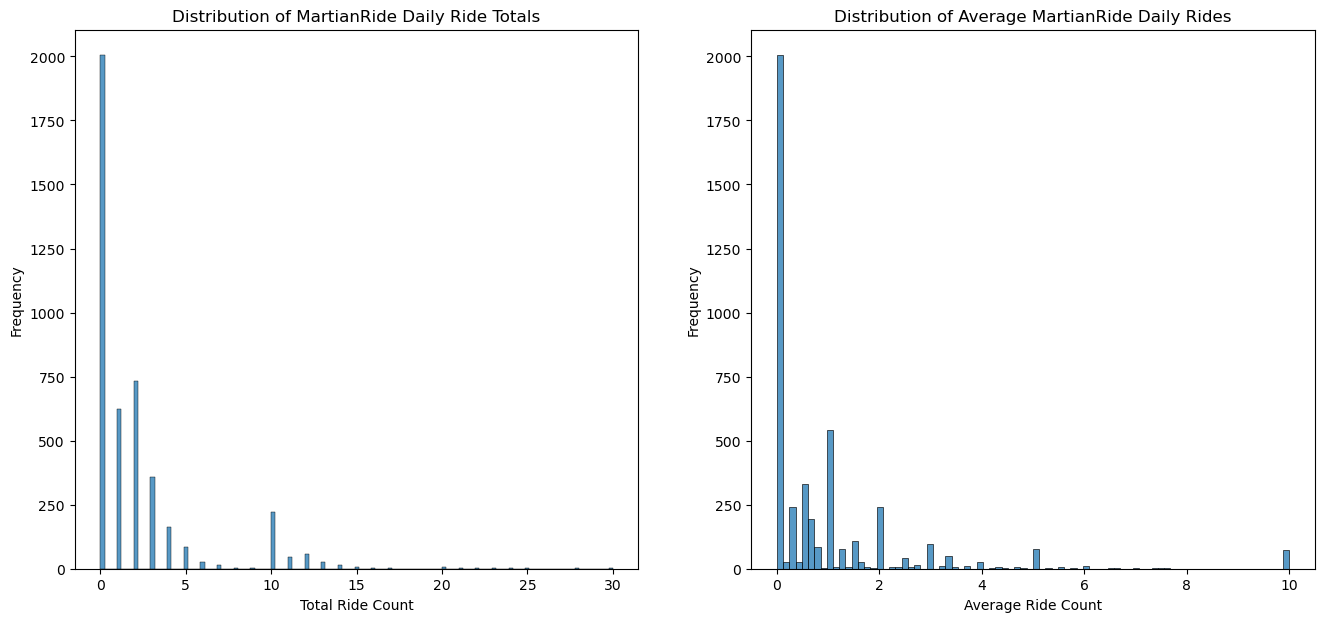

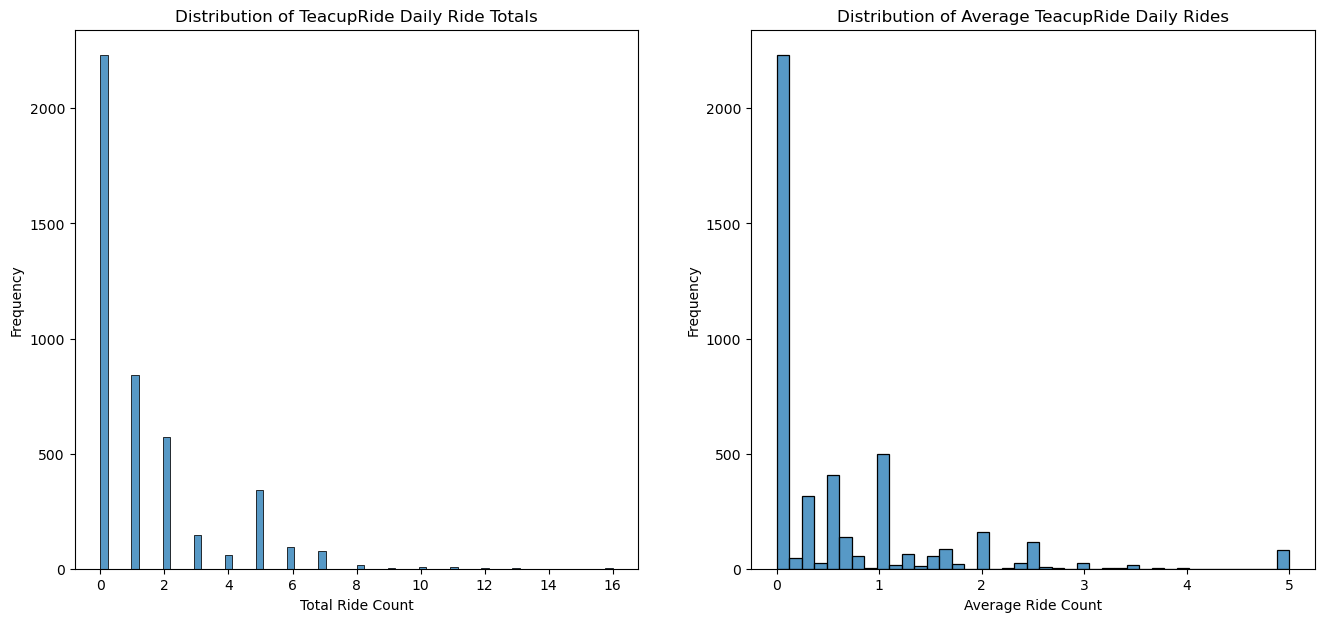

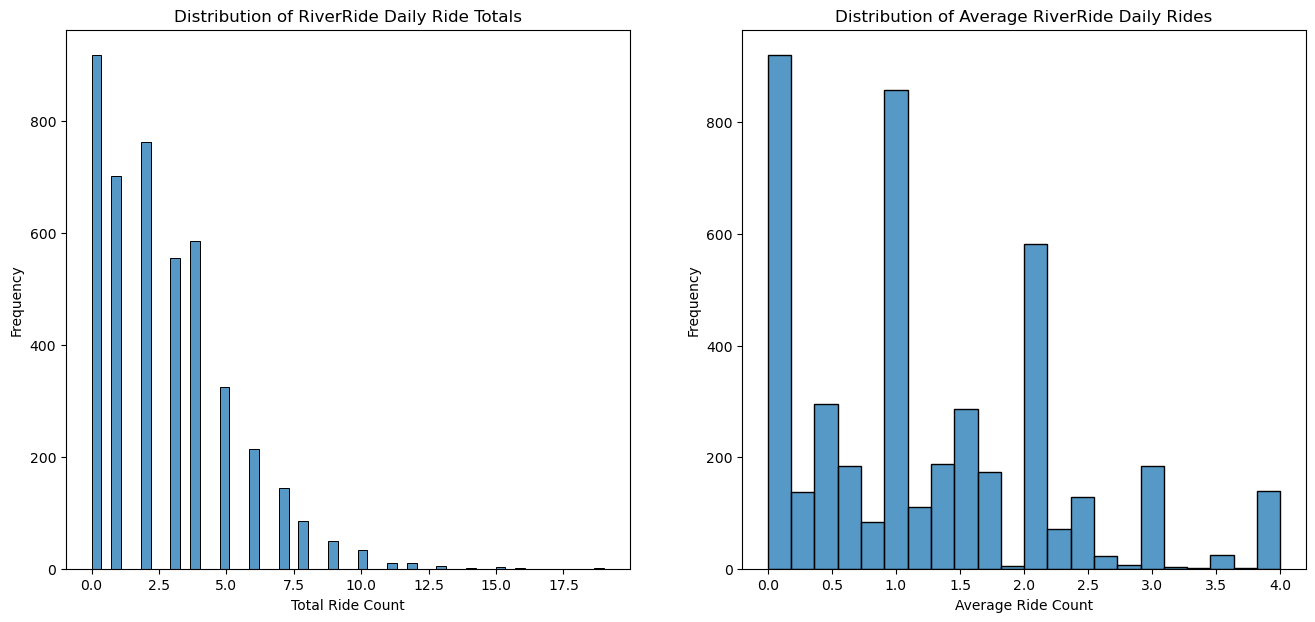

In [61]:
for col in interested_numeric_columns:
    ride_hists(df, col)

6. Make a bar chart showing the total number of Adult and Child participants.

Try to formulate your own Google search or ChatGPT prompt.

Here's one page I found:

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html

which shows some interesting examples for you to use.  I recommend clicking on the first, basic example to see how to use the function.

You can also look up the pandas documentation, which might lead to an entirely different method.

<BarContainer object of 2 artists>

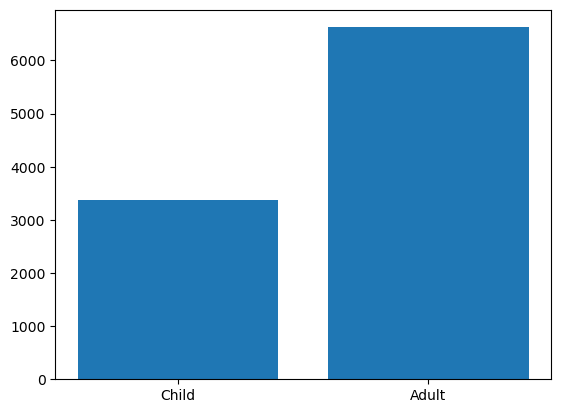

In [63]:
counts = df['IsAdult'].value_counts().sort_index()
labels = ['Child', 'Adult']

plt.bar(labels, counts)

7. Make a stacked bar chart showing how many Adult and Child visits took the River Ride, with the x-axis showing the number of rides and with two stacked bars (adult, child).  That is, there could be a column for the number of Adults (and Children) who took 0 rides, 1 ride, 2 rides, and so on.

Try to formulate your own Google search or ChatGPT prompt.

For me, the pandas documentation was easier than the matplotlib documentation.

* If you use the pandas method, you might have to one-hot encode the IsAdult column.  You might want names for the new columns other than True and False.  Use df.join or pd.concat to attach the pd.get_dummies table you've created, and then groupby the RiverRide value.

* You will need to end up with a small table with two columns (IsAdult True and False) and an index (RiverRide) as well as a small number of rows (the values of RiverRide)

* That said, if you can come up with another approach, it's fine.

In [65]:
df['Label'] = df['IsAdult'].map({True: 'Adult', False: 'Child'})
grouped = df.groupby(['RiverRide', 'Label']).size().unstack(fill_value=0)

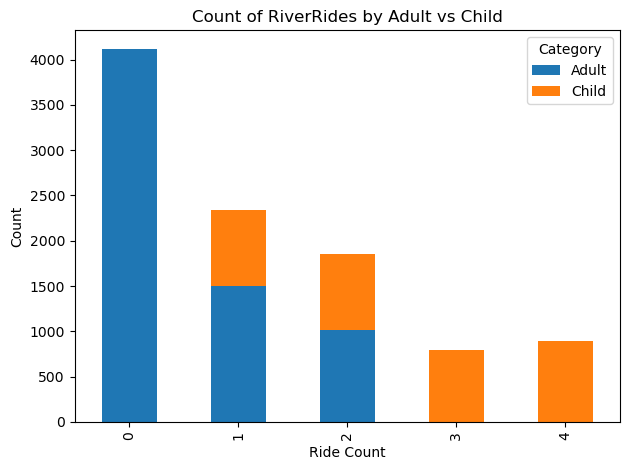

In [66]:
grouped.plot(kind='bar', stacked=True)
plt.xlabel("Ride Count")
plt.ylabel("Count")
plt.title("Count of RiverRides by Adult vs Child")
plt.legend(title="Category")
plt.tight_layout()
plt.show()

8. Other tasks

Use seaborn (import seaborn as sns) to create a kernel density estimation (kde) plot.  (You can choose any aspect of the amusement park dataset to plot.)  Here is a tutorial you can read about seaborn:

https://seaborn.pydata.org/tutorial/introduction.html

Seaborn often makes nicer looking graphs than pandas or matplotlib.

Now use seaborn to make a swarm plot, a violin plot, and a box plot.

Which plots are the best for showing this data?

For this exercise, I will take a look at one of the columns in this dataset that we haven't touched on so far. MoneySpent.

<Axes: xlabel='MoneySpent', ylabel='Density'>

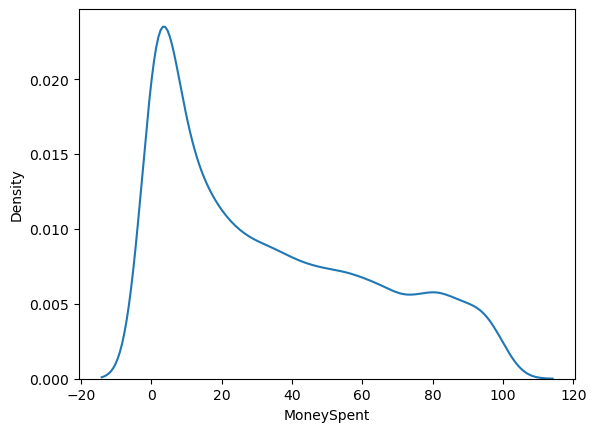

In [69]:
sns.kdeplot(df['MoneySpent'])

<Axes: ylabel='MoneySpent'>

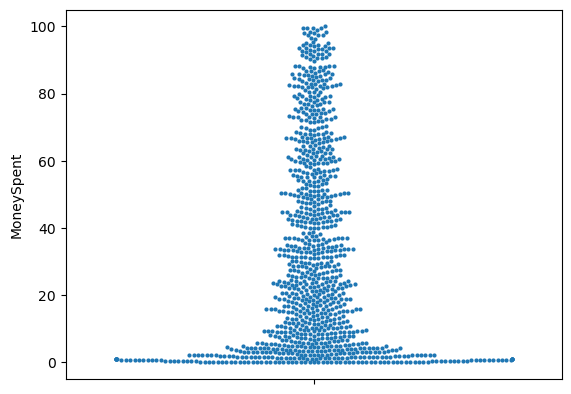

In [70]:
sns.swarmplot(df['MoneySpent'].sample(n=1000), size=3)

<Axes: ylabel='MoneySpent'>

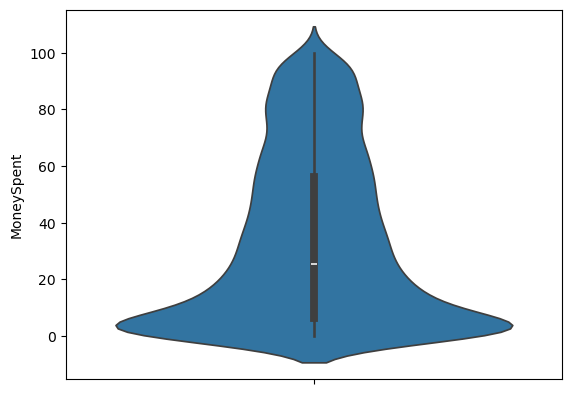

In [71]:
sns.violinplot(df['MoneySpent'])

<Axes: ylabel='MoneySpent'>

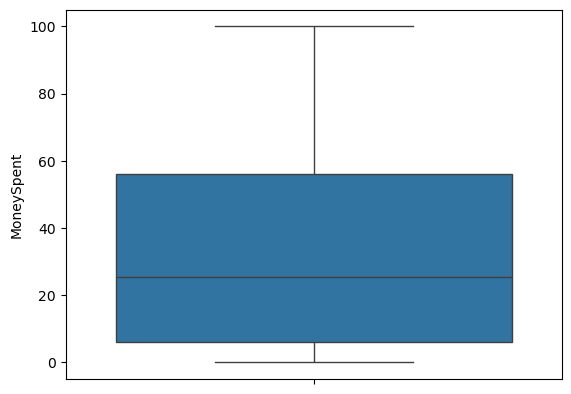

In [72]:
sns.boxplot(df['MoneySpent'])

Looking at the graphs produced above I think that each have some interesting takeaways. As for which ones display the data best, I would  have to go with the box plot. In terms of money spent, the box plot it perfects as it easily allows us to get a basic understanding of the quartile breakdown of spenders at the theme park. In addition, this view would allow us to easily spot any outliers in our data (in this case there do not appear to be any). Additionally I think the swamr plot is quite interesting as it allows us to see a breakdown of the individual spenders. We could potentially use this to segment our population based on money spent.

# 4. Storytelling With Data graph

Try to make a scatterplot using amusement park dataset that is similar to the one on page 45, where the two axes are the Teacup Ride count and the River Ride count.  If you want to see individual dots and not a dense swarm of dots, you'll have to cut the dataset down to a small number of points (say, 100 points or so).  You can remove the other points, for instance, and focus on the first 100 points.

Here are some things you could do (you don't have to do all of them):

* Draw a dashed line that roughly separates the adult from child points.

* Draw the points in the adult vs. child region of the graph in different colors.

* Choose the right size and number of dots to make the graph look good.

* Write a word that appears on the dashed line (like AVG in the plot on page 45).

If there are any other graphs in the Storytelling With Data chapter that look interesting, and you want more practice, you can try to reproduce them too.

In [75]:
first_100_df = df[0:100]

first_100_df

,VisitDate,IsAdult,MartianRide,TeacupRide,RiverRide,MoneySpent,Label
0,2010-01-01,False,0,1,4,10.30,Child
1,2010-01-01,True,3,0,0,38.77,Adult
2,2010-01-01,True,0,0,0,79.34,Adult
3,2010-01-01,True,0,0,1,87.84,Adult
4,2010-01-02,False,0,1,2,18.65,Child
...,...,...,...,...,...,...,...
95,2010-02-16,False,0,2,2,26.05,Child
96,2010-02-17,True,0,0,0,0.19,Adult
97,2010-02-17,False,0,1,3,43.48,Child
98,2010-02-17,True,0,0,1,36.30,Adult


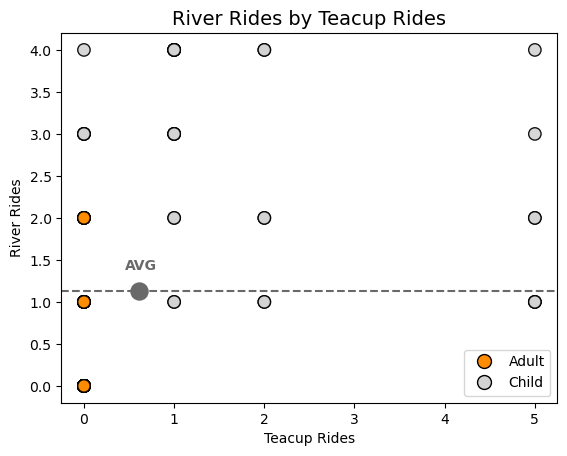

In [76]:
#convert our adult column to colors for the graph
colors = first_100_df['IsAdult'].map({True: 'darkorange', False: 'lightgray'})

#figure
fig, ax = plt.subplots()

#initial scatter plot
ax.scatter(first_100_df['TeacupRide'], first_100_df['RiverRide'], c=colors, s=80, edgecolors='k', alpha=0.9)

#creating average bar
avg_teacup = first_100_df['TeacupRide'].mean()
avg_river = first_100_df['RiverRide'].mean()
ax.scatter(avg_teacup, avg_river, color='dimgray', s=150, zorder=5)
ax.axhline(avg_river, color='dimgray', linestyle='--')
ax.text(avg_teacup-0.15, avg_river+0.25, 'AVG', fontsize=10, color='dimgray', fontweight='bold')

#labels
ax.set_title('River Rides by Teacup Rides', fontsize=14)
ax.set_xlabel('Teacup Rides')
ax.set_ylabel('River Rides')

#legend
adult_legend = plt.Line2D([0], [0], marker='o', color='w', label='Adult', markerfacecolor='darkorange', markersize=10, markeredgecolor='k')
child_legend = plt.Line2D([0], [0], marker='o', color='w', label='Child', markerfacecolor='lightgray', markersize=10, markeredgecolor='k')
ax.legend(handles=[adult_legend, child_legend], loc='lower right')


plt.show()